# Welcome to my notebook!

This is a Jupyter Notebook detailing the process of cleaning a dataset about movies, as well as extracting insights and correlations from it.

The dataset includes movies from 1986 to 2020, and is kindly provided by [Daniel Grijalva](https://www.kaggle.com/datasets/danielgrijalvas/movies) on Kaggle, and [Alex the Analyst](https://www.youtube.com/@AlexTheAnalyst) guided me through some of it.

# Importing the required libraries
First things first, we import the library necessary for data cleaning and analysis: Pandas, as well as two libraries necessary for dataviz: MatPlotLib and Seaborn.
We'll also import numpy, a mathematical library, just in case we need it.


In [3]:
# importing pandas
import pandas as pd

#importing numpy
import numpy as np

# importing seaborn
import seaborn as sns

# importing matplotlib and required models within it
import matplotlib
import matplotlib.pyplot as plt
# setting which plot style to use
plt.style.use('ggplot')
from matplotlib import figure

# the following is a "magic function" that makes Python store the visualizations in the Notebook so that one wouldn't need to execute the code every time they want to have a look. Each visualization will appear below the cell that contains its code
%matplotlib inline

# setting the size of the visualizations
matplotlib.rcParams['figure.figsize'] = (12,8)

# Importing the dataset into a pandas DataFrame
The **read_csv()** function from pandas takes the path of file, and imports the values and automatically stores them into a DataFrame.
Since both the Notebook and .csv file are stored in the same folder, all we need to do is put the name of the file.

In [4]:
df = pd.read_csv('movies.csv')

# Let's have a look at our data!
The **df.head()** function displays the top five rows of our DataFrame

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Checking for missing data
This will be done through a **for loop**, an **np.mean()** and an **ISNULL()** functions. The column number will iterate for each column, and will return a 0 or 1 based on whether there's a null value or not.

In [6]:
# creating the iterator that will go through the column list
for i in df.columns:
  pct_missing = np.mean(df[i].isnull())
  # making print() give us a neat message rather than just numbers
  print('{} - {}%'.format(i, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


# Deleting rows that are missing values
We notice that there are a missing values in a few rows. We'll use a **dropna()** function, with its default arguments, so it'll delete **rows** when **any** value is missing.

In [7]:
df = df.dropna()
# retrying the previous code to verify if the missing data is gone
for i in df.columns:
  pct_missing = np.mean(df[i].isnull())
  print('{} - {}%'.format(i, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


It worked! The dataset no longer contains missing values

# Verifying the data types
We'll use the **dtypes** method for this:

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

We notice that the votes, budget, gross and runtime are float when they're supposed to be integers. We'll change their data types using a **astype()** method

In [9]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

# checking if it has worked
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

# Correcting the Year column
We notice that the year column sometimes displays a release year that is different than the one used in the release date column like *Waking Life*. We'll correct it values taken from the release date column.
One method towards doing this is converting the record into a string, splitting it via the comma in the data, then extracting all the numbers after it.

In [10]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

# Ordering the movie list by gross revenue
Simply by the using the intuitively-named **sort_values()** method

In [11]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


I can't believe Avatar still grossed more than Avengers, I don't understand moviegoers

# Extracting all the rows
It's hard to extract any kind of insight when you only the top 5 and bottom 5 most successful movies, so we'll set the display option not to limit the amount of rows that show. I will look at the data using the Data Wrangler extension, it's pretty neat!


# Correlations
Now, we are ready to extract the correlations. We are mainly interested in the Gross Revenue of the movies so far, the following is a few of the factors that affect the performance of the movie in the box office, aside from the quality of the movie itself (groundbreaking stuff, I know, I feel like Sherlock right now):
- Budget
- The studio producing the movie (hypothesis)

A classic visualization to emphasize correlation is the scatterplot. We can easily MatPlotLib to visualize it, with **scatter()**.

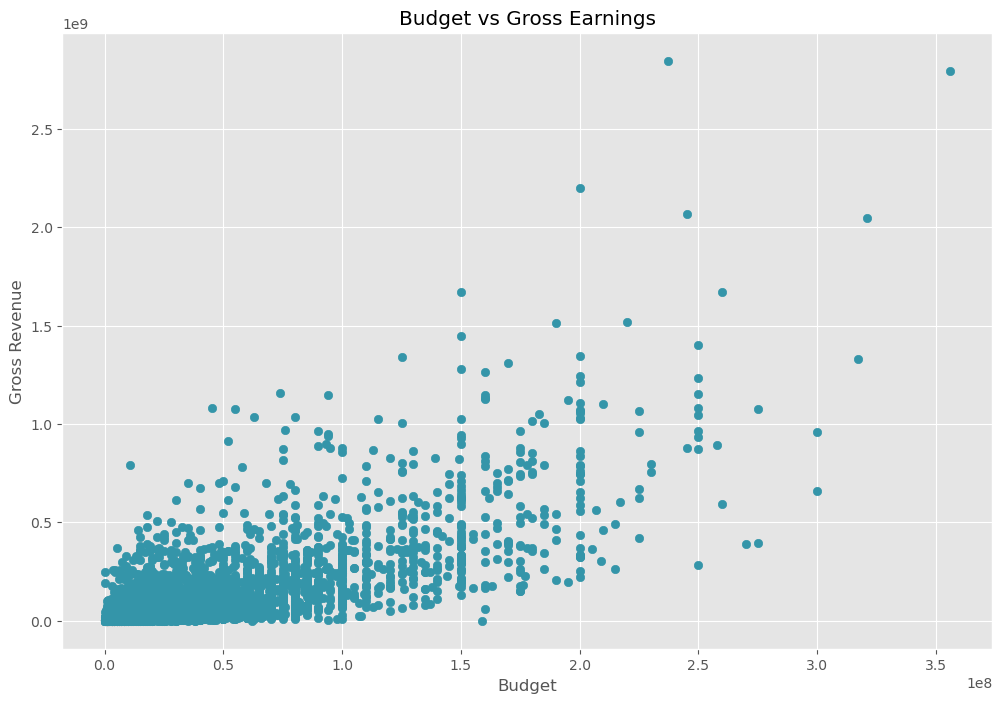

In [39]:
# Adding the visualization
plt.scatter(x=df['budget'],
            y=df['gross'],
            color = "#3495a9")
# Adding a title and axis labels
plt.title("Budget vs Gross Earnings")            
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")

plt.show()

One can notice a bit of correlation here, with outliers to boot. But to really see it, we can use a regression plot using Seaborn.

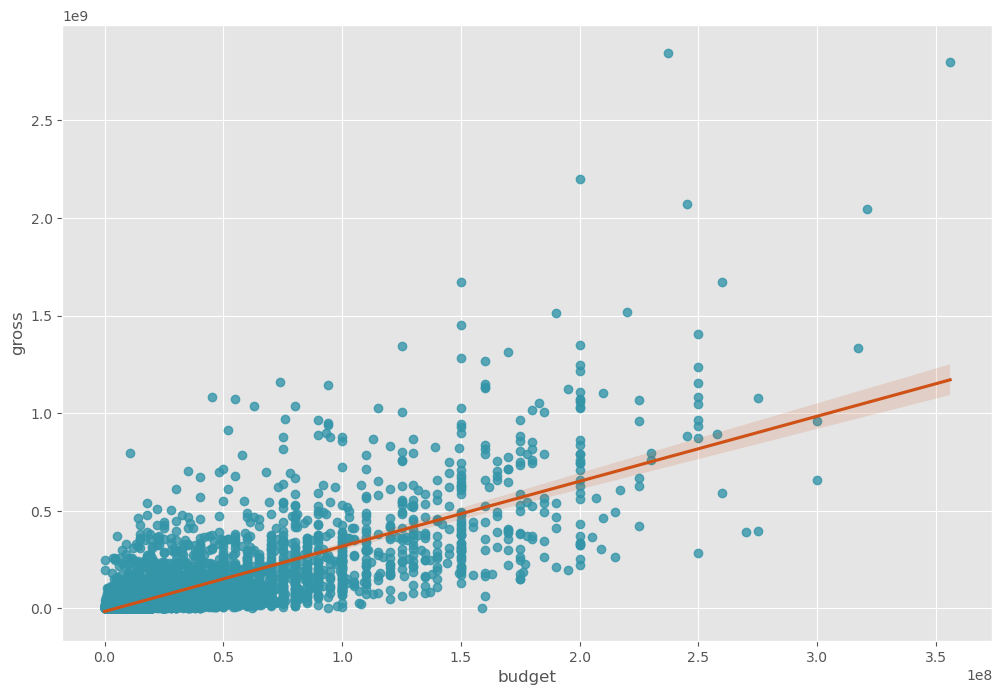

In [38]:
# Adding the plot
sns.regplot(x='budget', 
            y = 'gross', 
            data = df,
            scatter_kws={"color":"#3495a9"},
            line_kws = {"color": "#cf5116"})

plt.show()

We notice a positive correlation between the two. To be even more certain, and to make a correlation matrix, we can use **corr()** to acquire one.


In [30]:
# We're choosing the Pearson method since it's standard, and setting the "numeric_only" parameter to true so that it doesn't try to convert "The Shining" into a float.
df.corr(method = "pearson", numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


As we can see, the correlation between the film's budget and gross revenue is the highest in the entire dataset, followed by the votes the film got, which suggests that the initial audience reaction is also a large factor in most cases. But the table is a bit hard to read, so we can use a correlation matrix instead, also known as a heatmap.

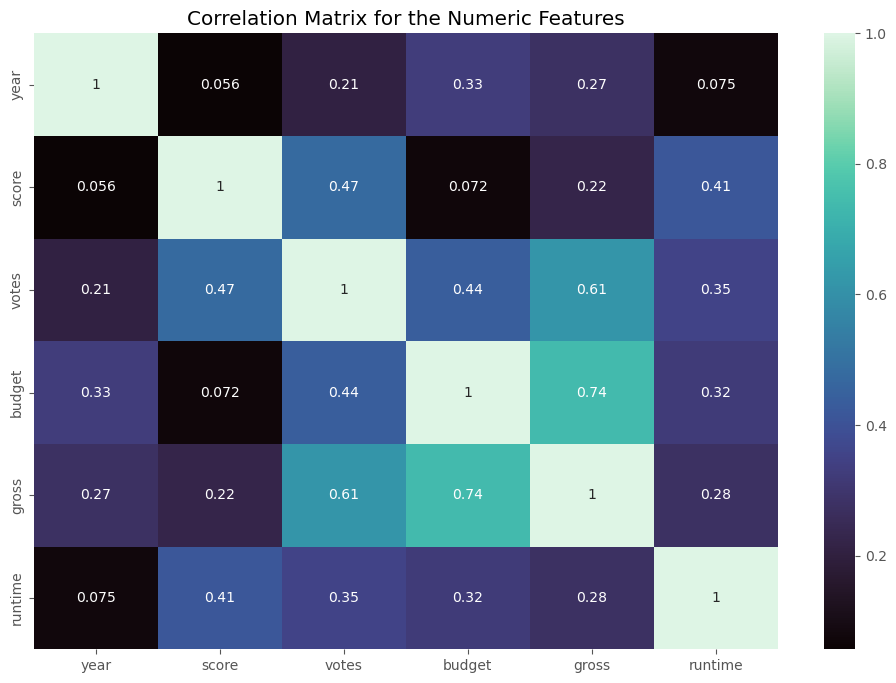

In [37]:
# Making the previous into a variable so we can keep the visualization command neat.
correlation_matrix = df.corr(method = "pearson", numeric_only=True)

# Adding the actual heatmap, the annot argument allows the heatmap to take the annotations from the the matrix we gave it, and cmap argument is the color map.
sns.heatmap(correlation_matrix, annot= True, cmap = "mako")

# Adding a title
plt.title("Correlation Matrix for the Numeric Features")

plt.show()

Something I noticed only through this heat map is that votes and gross revenue correlate as well!

# Correlation between Gross Revenue and the Production Company hypothesis
I have a hypothesis that the production company and its age and reputation also have an effect on a movie's success, but it's merely a hypothesis.

My approach to this is to sum the gross revenue grouped by both the company and the budget spent on the movie, and displaying the top 30 results. Due to low budget, indie companies aren't a part of our analysis.


In [32]:
# this one is a bit of a doozy compared to what we've seen. Methods in pandas work sequentially, so order is important when placing them. We start by grouping the movies by company and budget, then summing the gross revenue. Having done that, we sort the values (yes there is a built in argument in the group by method but it's only ascending), then we have it display the top 30 results!

df.groupby(['company', 'budget'])['gross'].sum().sort_values(ascending = False).head(n=30)


company                        budget   
Warner Bros.                   150000000    6263352048
Walt Disney Pictures           200000000    5302142917
Warner Bros.                   100000000    3702204073
                               125000000    3624588966
Marvel Studios                 200000000    3426165276
Walt Disney Animation Studios  150000000    3210848061
Twentieth Century Fox          200000000    3200135938
Columbia Pictures              90000000     2930742859
Warner Bros.                   250000000    2889234236
Twentieth Century Fox          237000000    2847246203
Marvel Studios                 356000000    2797501328
Universal Pictures             75000000     2760867179
Warner Bros.                   160000000    2691973739
Twentieth Century Fox          110000000    2630540515
Paramount Pictures             150000000    2618081133
Marvel Studios                 250000000    2556147036
Columbia Pictures              40000000     2491945895
Pixar Animation Studios 

With what we see here, one may say that bigger and older companies tend to have higher profit in their movies, but it's not possible to determine whether that's really just the budget or if the company name is affecting it as well.

It's quite disappointing to me, to say the truth, but I feel like we managed to get good insights.

# Finding which genre is the most profitable
I'm almost certain that the biggest draw is action movies, like Avengers or Fast & Furious, but it's also worth checking to see how how close others genres are.

To check this, a simple bar chart will do the trick.

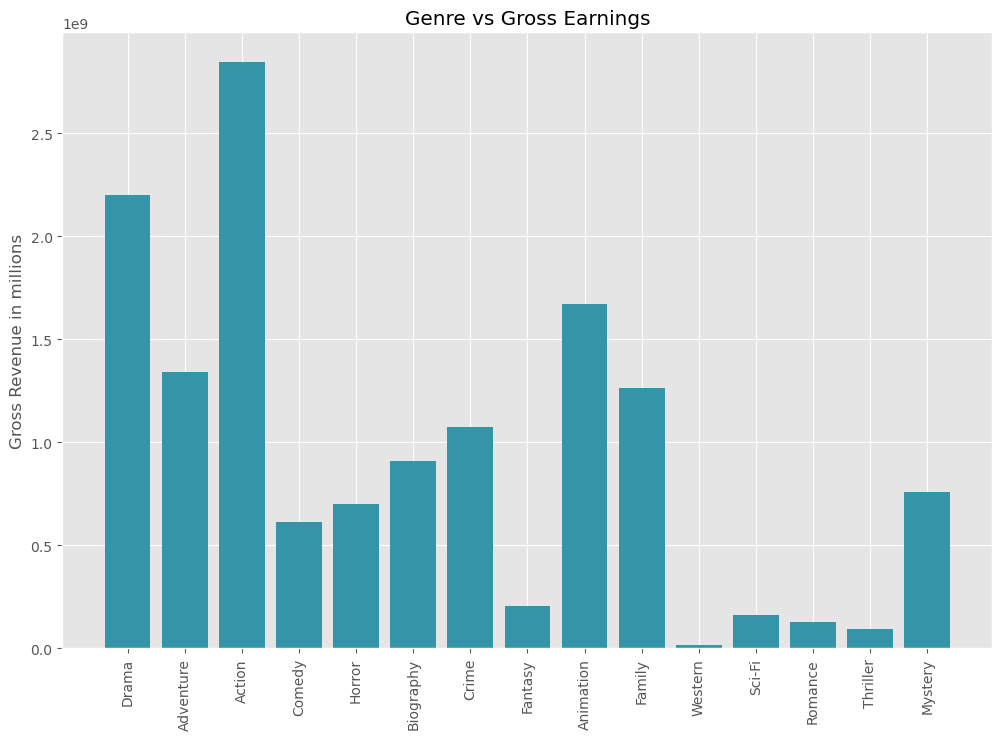

In [36]:
# Adding the visualization
plt.bar(x= df["genre"],
        height= df["gross"],
        color = "#3495a9")

# Adding a title and y-axis label
plt.title("Genre vs Gross Earnings")            
plt.ylabel("Gross Revenue in millions")

# Formatting the x-axis ticks
plt.xticks(rotation = 90)

plt.show()

As we can see, Action is the king by a large margin, a mindless action movie seems to be the most enjoyable form of movie to viewers, next is drama because relatable stories and struggles are the strongest itch when you're in the mood. Animation is third in popularity because children are quite a large demographic, plus it's accessible to everyone.

I'm honestly disappointed in fantasy! Medieval Fantasy is my favorite setting thanks to The Witcher by A. Sapkowski. And cyberpunk when it's done right (it's rarely done right) thanks to Ace Combat 3, but looking at the sci-fi bar, we see that it also only enjoys a fraction of the potential revenue.


# Conclusion

So, we've cleaned our data set and through our analysis, we found that among the most important factors of a movie's success is the budget spent on it, from production to marketing, as well as the reviews it got from critic and consumer alike. A large-production action movie that is good enough to get good reviews, is pretty much guaranteed to be successful.